# <center>Machine Learning Project - Energy Efficiency Data Set</center>

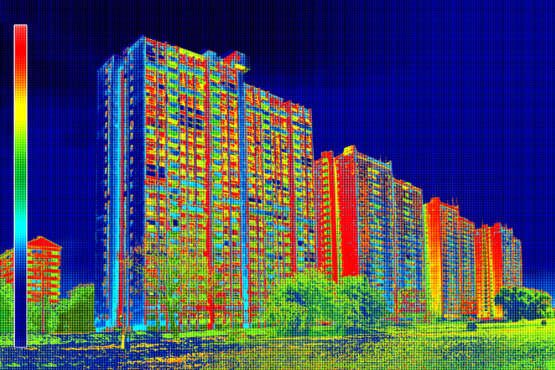

## 1. Introduction

Several machine learning frameworks will be developed to study the effect of eight input variables on two output variables (heating load and cooling load) of residential buildings. Building energy simulation tools are widely used to analyse and forecast building energy consumption in order to facilitate the design and operation of energy efficient buildings. The data has been downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/energy+efficiency).

The 8 input variables are: 
+ `X1`, relative compactness 
+ `X2`, surface area (m<sup>2</sup>)
+ `X3`, wall area (m<sup>2</sup>) 
+ `X4`, roof area (m<sup>2</sup>) 
+ `X5`, overall height (m)
+ `X6`, orientation
+ `X7`, glazing area (%) 
+ `X8`, glazing area distribution,

The 2 output variables are: 
+ `Y1`, heating load (kWh/m<sup>2</sup>)
+ `Y2`, cooling load (kWh/m<sup>2</sup>)

## 2. Data Exploration

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
# read the data into a pandas dataframe
energy = pd.read_excel('ENB2012_data.xlsx')

In [3]:
# look at the structure of the data
energy.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,NaN,NaN


In [4]:
# drop null columns
energy.drop(columns=['Unnamed: 10', 'Unnamed: 11'], inplace=True)

In [5]:
# check null columns have been dropped
energy.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [6]:
# check how many observations there are
energy.shape

(768, 10)

In [7]:
# check how many null values there are in each column
energy.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [8]:
# check the data type of each column
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


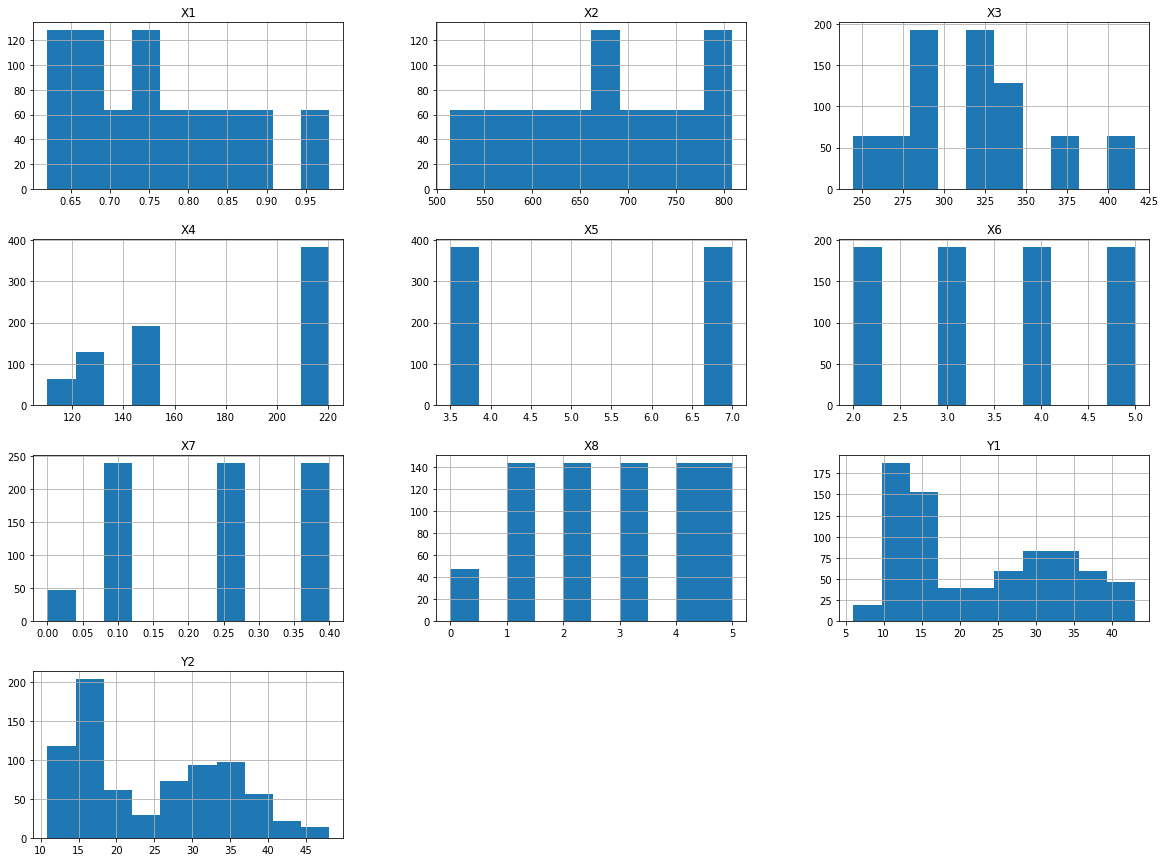

In [9]:
# check the distribution of values in each column
energy.hist(figsize=(20,15))
plt.show()

Lets further investigate features `X4`-`X8` as there are many gaps in their respective histograms. This is normally an indication that these features may actually be categories.

In [10]:
# check how many  unique values there are in each column
energy.nunique(axis=0)

X1     12
X2     12
X3      7
X4      4
X5      2
X6      4
X7      4
X8      6
Y1    587
Y2    636
dtype: int64

In [11]:
# Check the value counts of columns X4 to X8
for feature in energy.columns[3:8]:
    print(energy[feature].value_counts())
    print('\n')

220.50    384
147.00    192
122.50    128
110.25     64
Name: X4, dtype: int64


3.5    384
7.0    384
Name: X5, dtype: int64


2    192
3    192
4    192
5    192
Name: X6, dtype: int64


0.40    240
0.10    240
0.25    240
0.00     48
Name: X7, dtype: int64


1    144
2    144
3    144
4    144
5    144
0     48
Name: X8, dtype: int64




Features `X4`, `X5` and `X7` will remain as numerical type because they describe the roof area, height, and glazing area respectively. Features `X6` and `X8` will be converted to the categorical type as these numbers have no intrinsic value.

In [12]:
# convert columns X6 and X8 to categorical type
for col in energy.columns[5:8:2]:
    energy[col] = energy[col].astype("category")

In [13]:
# confirm X6 and X8 are of the categorical type
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   X1      768 non-null    float64 
 1   X2      768 non-null    float64 
 2   X3      768 non-null    float64 
 3   X4      768 non-null    float64 
 4   X5      768 non-null    float64 
 5   X6      768 non-null    category
 6   X7      768 non-null    float64 
 7   X8      768 non-null    category
 8   Y1      768 non-null    float64 
 9   Y2      768 non-null    float64 
dtypes: category(2), float64(8)
memory usage: 50.0 KB


In [14]:
# generate descriptive statistics for  numerical columns only
energy.describe()

,X1,X2,X3,X4,X5,X7,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,0.234375,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,0.133221,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,0.000000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,0.100000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,0.250000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,0.400000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,0.400000,43.100000,48.030000


In [15]:
# create dummy columns for X6 and X8
for col in energy.columns[5:8:2]:
    dummies = pd.get_dummies(energy[col], prefix=col)
    energy = pd.concat([energy, dummies], axis=1)
    energy = energy.drop(columns=col)

In [16]:
energy = energy.sort_index(axis=1)

In [17]:
energy.head()

,X1,X2,X3,X4,X5,X6_2,X6_3,X6_4,X6_5,X7,X8_0,X8_1,X8_2,X8_3,X8_4,X8_5,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,1,0,0,0,0.0,1,0,0,0,0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,0,1,0,0,0.0,1,0,0,0,0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,0,0,1,0,0.0,1,0,0,0,0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,0,0,0,1,0.0,1,0,0,0,0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,1,0,0,0,0.0,1,0,0,0,0,0,20.84,28.28


In [18]:
# check how many feature we have now, because we added dummy columns
features = energy.columns[:-2]
len(features)

16

In [19]:
features

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6_2', 'X6_3', 'X6_4', 'X6_5', 'X7',
       'X8_0', 'X8_1', 'X8_2', 'X8_3', 'X8_4', 'X8_5'],
      dtype='object')

In [20]:
# normalize all feature columns so that the minimum values are 0 and maximum values are 1
all_x_scaled = (
    (energy[features] - energy[features].min(axis=0)) / (energy[features].max(axis=0) - energy[features].min(axis=0))
)

all_x_scaled

,X1,X2,X3,X4,X5,X6_2,X6_3,X6_4,X6_5,X7,X8_0,X8_1,X8_2,X8_3,X8_4,X8_5
0,1.000000,0.000000,0.285714,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.000000,0.285714,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.000000,0.285714,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.000000,0.285714,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.777778,0.166667,0.428571,0.111111,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.055556,0.916667,0.571429,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
764,0.000000,1.000000,0.714286,1.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
765,0.000000,1.000000,0.714286,1.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
766,0.000000,1.000000,0.714286,1.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## 3. Training a Baseline Model

In [21]:
from sklearn.linear_model import LinearRegression

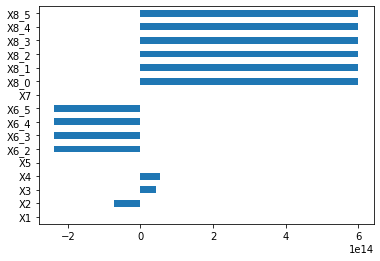

In [22]:
# Check feature importance when Y1 is the target column
lr = LinearRegression()
lr.fit(all_x_scaled, energy['Y1'])
coefficients = lr.coef_
feature_importance = pd.Series(coefficients, index=features)
feature_importance.plot.barh()
plt.show()

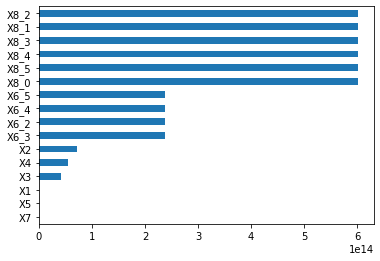

In [23]:
# plot features in order of importance
ordered_feature_importance = feature_importance.abs().sort_values()
ordered_feature_importance.plot.barh()
plt.show()

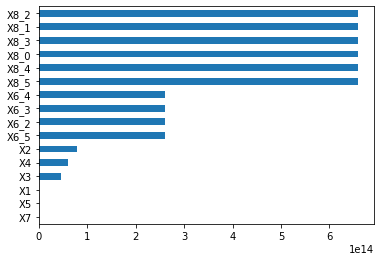

In [24]:
# check feature importance when Y2 is the target column
lr.fit(all_x_scaled, energy['Y2'])
coefficients = lr.coef_
feature_importance = pd.Series(coefficients, index=features)
ordered_feature_importance = feature_importance.abs().sort_values()
ordered_feature_importance.plot.barh()
plt.show()

The engineered features (`X8` and `X6`) have the highest coefficients followed by `X2`, `X4` and `X3` for both target columns (`Y1` and `Y2`).

Features `X1`, `X5`, and `X7` have the lowest coefficient values.

In [25]:
from sklearn.model_selection import cross_val_score, KFold

In [26]:
kf = KFold(n_splits=4, shuffle=True, random_state=1)

The metric we will use to examine model performance will be the R<sup>2</sup> score. The best possible R<sup>2</sup> score is 1.0

The R<sup>2</sup> score provides a measure of how well unseen samples are likely to be predicted by a model.

In [27]:
# calculate the R2 score when Y1 is the target column
r2_score_y1 = cross_val_score(lr, all_x_scaled, energy['Y1'], scoring='r2', cv=kf)
avg_r2_score_y1 = np.mean(r2_score_y1)
avg_r2_score_y1

0.9202600874021457

In [28]:
# drop the 3 least important features
x_scaled_dropped_features = all_x_scaled.drop(columns=['X1', 'X5', 'X7'])

In [29]:
# calculate the R2 score when Y1 is the target column and 3 features have been dropped
r2_score_y1_droppped_features = cross_val_score(lr, x_scaled_dropped_features, energy['Y1'], scoring='r2', cv=kf)
avg_r2_score_y1_droppped_features = np.mean(r2_score_y1_droppped_features)
avg_r2_score_y1_droppped_features

0.8223809198911368

Dropping the features `X1`, `X5` and `X7` lowers the R<sup>2</sup> score by approximately 0.1. 

All features will be used to make predictions as this will give a higher R<sup>2</sup> score.

In [30]:
# calculate the R2 score when Y2 is the target column
r2_score_y2 = cross_val_score(lr, all_x_scaled, energy['Y2'], scoring='r2', cv=kf)
avg_r2_score_y2 = np.mean(r2_score_y2)
avg_r2_score_y2

0.8852545020227204

## 4. Feature Selection with RFECV

To confirm that using all features will produce the highest R<sup>2</sup> score, we can use the Recursive Feature Elimination with Cross Validation class.

In [31]:
from sklearn.feature_selection import RFECV

In [32]:
selector = RFECV(lr, cv=kf)
selector.fit(all_x_scaled, energy['Y1'])
optimised_columns = all_x_scaled.columns[selector.support_]

In [33]:
optimised_columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6_2', 'X6_3', 'X6_4', 'X6_5', 'X7',
       'X8_0', 'X8_1', 'X8_2', 'X8_3', 'X8_4', 'X8_5'],
      dtype='object')

In [34]:
len(optimised_columns)

16

As expected, all feature columns will be used as this produces the highest R<sup>2</sup> score.

## 5. KNeighborsRegressor

In [35]:
from sklearn.neighbors import KNeighborsRegressor

In [36]:
knn = KNeighborsRegressor()

In [37]:
# calculate the R2 score when Y1 is the target column
r2_knn_y1 = cross_val_score(knn, all_x_scaled, energy['Y1'], scoring='r2', cv=kf)
avg_r2_knn_y1 = np.mean(r2_knn_y1)
avg_r2_knn_y1

0.858041246808638

In [38]:
# calculate the R2 score when Y2 is the target column
r2_knn_y2 = cross_val_score(knn, all_x_scaled, energy['Y2'], scoring='r2', cv=kf)
avg_r2_knn_y2 = np.mean(r2_knn_y2)
avg_r2_knn_y2

0.8360069882731356

### 5.1. Tuning the KNeighborsRegressor Model

In [40]:
knn_r2_scores_y1 = dict()
for k in range(1, 50, 2):
    knn = KNeighborsRegressor(n_neighbors=k)
    r2_scores = cross_val_score(knn, all_x_scaled, energy['Y1'], scoring='r2', cv=kf)
    avg_r2_knn = np.mean(r2_scores)
    knn_r2_scores_y1[k] = avg_r2_knn

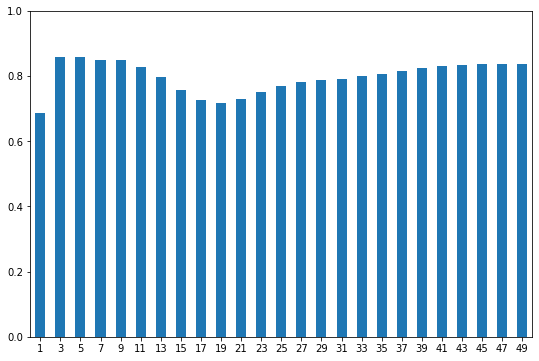

In [63]:
pd.Series(knn_r2_scores_y1).plot.bar(figsize=(9,6), ylim=(0, 1), rot=0)
plt.show()

It can be seen that the best k value to choose is somewhere between 3 and 11. So we will use this range in our grid search.

In [42]:
from sklearn.model_selection import GridSearchCV

hyperparameters = {
    "n_neighbors": range(3,12),
    "weights": ['distance', 'uniform'],
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "p": [1,2]
}

grid_knn = GridSearchCV(knn, param_grid=hyperparameters, scoring='r2', cv=kf)
grid_knn.fit(all_x_scaled, energy['Y1'])
best_params_knn = grid_knn.best_params_

In [43]:
best_params_knn

{'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [64]:
best_knn = grid_knn.best_estimator_
best_knn

KNeighborsRegressor(algorithm='ball_tree', p=1, weights='distance')

In [45]:
# calculate the R2 score when Y1 is the target column for the tuned knn model
r2_best_knn_y1 = cross_val_score(best_knn, all_x_scaled, energy['Y1'], scoring='r2', cv=kf)
avg_r2_best_knn_y1 = np.mean(r2_best_knn_y1)
avg_r2_best_knn_y1

0.8793191606445883

In [46]:
# calculate the R2 score when Y2 is the target column for the tuned knn model
r2_best_knn_y2 = cross_val_score(best_knn, all_x_scaled, energy['Y2'], scoring='r2', cv=kf)
avg_r2_best_knn_y2 = np.mean(r2_best_knn_y2)
avg_r2_best_knn_y2

0.8619206807629499

We have improved the R<sup>2</sup> score: 

* from 0.8580 to 0.8793 when the target column is `Y1`
* from 0.8360 to 0.8619 when the target column is `Y2`

## 6. RandomForestRegressor

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
# calculate the R2 score when Y1 is the target column
rfr = RandomForestRegressor(random_state=1)
r2_rfr_y1 = cross_val_score(rfr, all_x_scaled, energy['Y1'], scoring='r2', cv=kf)
avg_r2_rfr_y1 = np.mean(r2_rfr_y1)
avg_r2_rfr_y1

0.9973765527070811

In [49]:
# calculate the R2 score when Y2 is the target column
r2_rfr_y2 = cross_val_score(rfr, all_x_scaled, energy['Y2'], scoring='r2', cv=kf)
avg_r2_rfr_y2 = np.mean(r2_rfr_y2)
avg_r2_rfr_y2

0.9618123675441128

### 6.1. Tuning the RandomForestRegressor Model

In [50]:
# look for the highest R2 score with different number of estimators
rfr_r2_scores_y1 = dict()
for n in range(100, 201, 10):
    rfr = RandomForestRegressor(n_estimators=n, random_state=1)
    r2_scores = cross_val_score(rfr, all_x_scaled, energy['Y1'], scoring='r2', cv=kf)
    avg_r2_rfr = np.mean(r2_scores)
    rfr_r2_scores_y1[n] = avg_r2_rfr

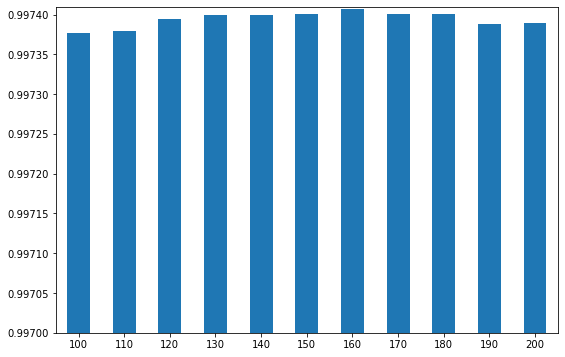

In [51]:
pd.Series(rfr_r2_scores_y1).plot.bar(figsize=(9,6), ylim=(0.997, 0.99741), rot=0)
plt.show()

The best number of estimators is 160.

In [52]:
# look for the highest R2 score with different max_depth values
rfr_r2_scores_y1 = dict()
for n in range(1, 21):
    rfr = RandomForestRegressor(max_depth=n, random_state=1)
    r2_scores = cross_val_score(rfr, all_x_scaled, energy['Y1'], scoring='r2', cv=kf)
    avg_r2_rfr = np.mean(r2_scores)
    rfr_r2_scores_y1[n] = avg_r2_rfr

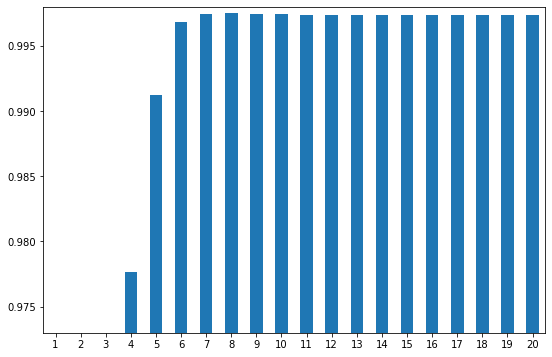

In [53]:
pd.Series(rfr_r2_scores_y1).plot.bar(figsize=(9,6), ylim=(0.973, 0.998), rot=0)
plt.show()

The best max_depth value is approximately 8, if we increase `max_depth` further this does not increase the R<sup>2</sup> score.

In [54]:
hyperparameters = {
    'criterion': ['mse', 'mae'],
    'max_depth': range(6, 11),
    'max_features': ['log2', 'sqrt', 'auto'],
    'n_estimators': range(150, 201, 10)
}

In [55]:
rfr = RandomForestRegressor(random_state=1)
grid_rfr = GridSearchCV(rfr, param_grid=hyperparameters, scoring='r2', cv=kf)
grid_rfr.fit(all_x_scaled, energy['Y1'])
best_params = grid_rfr.best_params_
best_params

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 160}

In [61]:
best_rfr = grid_rfr.best_estimator_
best_rfr

RandomForestRegressor(max_depth=8, n_estimators=160, random_state=1)

In [58]:
r2_rfr_y1 = cross_val_score(best_rfr, all_x_scaled, energy['Y1'], scoring='r2', cv=kf)
avg_r2_rfr_y1 = np.mean(r2_rfr_y1)
avg_r2_rfr_y1

0.9975081509791616

In [59]:
r2_rfr_y2 = cross_val_score(best_rfr, all_x_scaled, energy['Y2'], scoring='r2', cv=kf)
avg_r2_rfr_y2 = np.mean(r2_rfr_y2)
avg_r2_rfr_y2

0.9631487947012204

We have improved the R<sup>2</sup> score: 

* from 0.9974 to 0.9975 when the target column is `Y1`
* from 0.9618 to 0.9631 when the target column is `Y2`

## 7. Conclusions

* Features `X6` and `X8` were converted to the categorical data type
* Dummy columns were created for features `X6` and `X8`
* All the feature columns were nomalised to show a value between 0 and 1
* The least important features are `X1`, `X5` and `X7`

* Three different regression models were trained, the results are shown below:

| Model   | R<sup>2</sup> Score (Y1) | R<sup>2</sup> Score (Y2) |
| ----------- | ----------- | ----------- |
| LinearRegression      |    0.9203    |    0.8224         |
| KNeighborsRegressor   | 0.8580      |      0.8360       |
| KNeighborsRegressor (Tuned)  | 0.8793     |      0.8619       |
| RandomForestRegressor   |    0.9974   |       0.9618      |
| RandomForestRegressor (Tuned)  |   0.9975   |      0.9631       |

## 8. Recommendations for Further Work

I intend to deploy the tuned RandomForestRegressor model by building an API with the FastAPI library. The user will have to input the variables `X1`-`X8` and two predicted values (`Y1` and `Y2`) will be returned back to the user.

This is currently under development. Please watch this space for updates.